## Exercise 2: Crisp vs. Fuzzy $k$-means
1. Crisp has better computational performance as only one membership has to be tracked for each data point. \[todo: source\]
2. The crisp algorithm shows a stronger reaction to increasing noise: the cluster center moves faster towards the noise source. At a noise level of 85 the clusters suddenly rearrange: the cluster centers jump to entirely different locations, leaving one noise cluster and one cluster that is comprised of roughly the original clusters. The clusters of the fuzzy algorithm does not jump.

In [1]:
# Exercise 2, parts 3a)-e)
from sklearn.datasets import load_sample_image
from skimage.transform import rescale
from skimage.util import random_noise
from skfuzzy import cmeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cluster_image(image,n_clusters,fuzzifier):
    n_pixels = image.shape[0]*image.shape[1]
    pixel_list = np.reshape(image, (n_pixels,3))
    
    # applying fuzzy k-means algorithm
    cntr, u, u0, d, jm, p, fpc =  cmeans(pixel_list.T,c=n_clusters,m=fuzzifier,error=1e-4,maxiter=2000,seed=1)
    # find nearest centroids and replace
    cluster_membership = np.argmax(u, axis=0)
    k = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j,:] = cntr[cluster_membership[k]]
            k += 1
    return image 

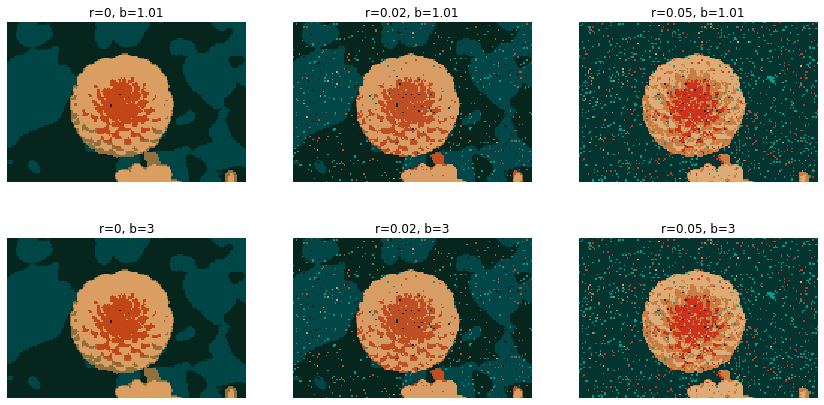

In [8]:
n_clusters = 5
b = [1.01, 3]
noise_ratios = [0, 0.02, 0.05]

image = load_sample_image("flower.jpg")
image = rescale(image, (0.25,0.25,1)) # automatically transforms image to range [0;1]
images_noise = []

fig, axs = plt.subplots(len(b),len(noise_ratios))
fig.subplots_adjust(top=1.5,right=2) # enlarge individual plots

for j, noise_ratio in enumerate(noise_ratios):
    # create img versions with noise
    images_noise.append(random_noise(image,mode='s&p',seed=1,amount=noise_ratio))
    
    for i, fuzzifier in enumerate(b):
        clustered_image = cluster_image(images_noise[-1],n_clusters,fuzzifier)
        axs[i,j].imshow(clustered_image)
        axs[i,j].axis('off')
        axs[i,j].set_title(f"r={noise_ratio}, b={fuzzifier}")
plt.show()

3e) i. There are only small differences between the two methods - only a few pixels get assigned to a different cluster. The differences are most notable in the noise clustering where for fuzzy clustering the noise gets grouped into fewer clusters. 
*(For some reason passing a variable as fuzzifier to cmeans does not work: The result is the same. Hardcoding the value however yields the expected results.)*

ii. We have been clustering by color. Since no spacial clustering is undertaken there is no reason why the amount of noise should be reduced. However there is a slight improvement (see above).